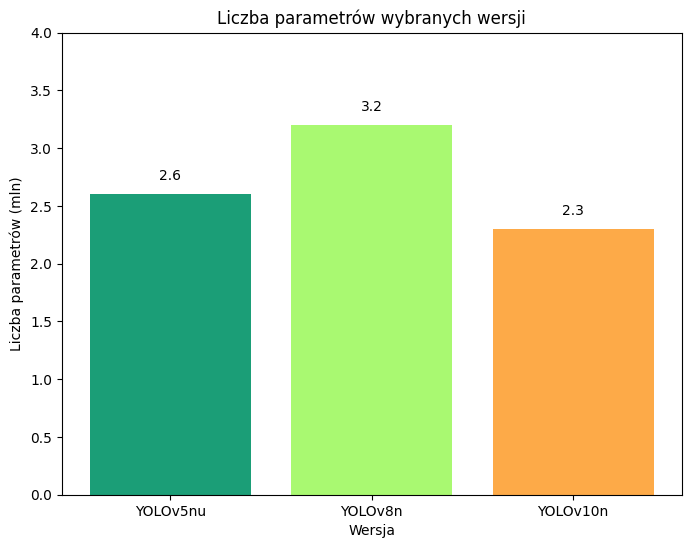

In [5]:
import matplotlib.pyplot as plt

# Data for the chart
versions = ["YOLOv5nu", "YOLOv8n", "YOLOv10n"]
parameters = [2.6, 3.2, 2.3]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(versions, parameters, color=['#1b9e77', '#a9f971', '#fdaa48'])
plt.grid(visible=True, which="minor")
plt.xlabel("Wersja")
plt.ylabel("Liczba parametrów (mln)")
plt.title("Liczba parametrów wybranych wersji")
plt.ylim(0, 4)  # Set y-axis limit

# Add labels to the bars
for i, param in enumerate(parameters):
    plt.text(i, param + 0.1, f"{param:.1f}", ha="center", va="bottom")

# Show the chart
plt.show()


In [6]:
# Sprawdzenie wersji cuda
import torch
torch.cuda.is_available()
torch.cuda.current_device()
torch.cuda_version

'12.1'

In [7]:
%pip install ultralytics --user
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
Setup complete ✅ (32 CPUs, 63.7 GB RAM, 476.4/953.9 GB disk)


In [ ]:
#Pobranie datasetu
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="w5iIdQUwTd5ZBNdYMVhY")
project = rf.workspace("augmented-startups").project("playing-cards-ow27d")
version = project.version(4)
dataset = version.download("yolov5")


In [1]:
%load_ext tensorboard
%tensorboard --logdir runs\detect\

Launching TensorBoard...

ValueError: No escaped character

In [3]:
model = YOLO("yolov5nu.pt")
model.info()
results = model.train(data="D:/cards-project/Playing-Cards-4/data.yaml", epochs=20, imgsz=640, device='gpu', batch=-1, optimizer='AdamW', name='v5nu-adamw')

YOLOv5n summary: 262 layers, 2654816 parameters, 0 gradients, 7.8 GFLOPs
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov5nu.pt, data=D:/cards-project/Playing-Cards-4/data.yaml, epochs=20, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=gpu, workers=8, project=None, name=v5nu-adamw, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream

100%|██████████| 755k/755k [00:00<00:00, 5.28MB/s]


Overriding model.yaml nc=80 with nc=52

                   from  n    params  module                                       arguments                     
  0                  -1  1      1760  ultralytics.nn.modules.conv.Conv             [3, 16, 6, 2, 2]              
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      4800  ultralytics.nn.modules.block.C3              [32, 32, 1]                   
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  3    156928  ultralytics.nn.modules.block.C3              [128, 128, 3]                 
  7                  -1  1    295424  ultralytic

train: Scanning D:\cards-project\Playing-Cards-4\train\labels.cache... 21203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21203/21203 [00:00<?, ?it/s]
val: Scanning D:\cards-project\Playing-Cards-4\valid\labels.cache... 2020 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2020/2020 [00:00<?, ?it/s]


Plotting labels to runs\detect\v5nu-adamw\labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.00046875), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\v5nu-adamw
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.29G      1.444      2.397      1.149        143        640: 100%|██████████| 707/707 [03:59<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/34 [00:00<?, ?it/s]c:\Users\z004nn5d\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:19<00:00,  1.75it/s]

                   all       2020       8080      0.504      0.734      0.687      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.33G       1.37      1.204      1.143        122        640: 100%|██████████| 707/707 [04:00<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:37<00:00,  1.11s/it]

                   all       2020       8080      0.861      0.889      0.962      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.39G      1.349     0.9858      1.129        102        640: 100%|██████████| 707/707 [03:50<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:20<00:00,  1.65it/s]

                   all       2020       8080      0.918      0.947      0.984      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.38G      1.327     0.8693      1.118        110        640: 100%|██████████| 707/707 [03:50<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:36<00:00,  1.07s/it]

                   all       2020       8080      0.972      0.979      0.992      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.39G      1.306      0.795      1.108        126        640: 100%|██████████| 707/707 [03:50<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:19<00:00,  1.71it/s]

                   all       2020       8080      0.982      0.988      0.994      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.37G       1.29     0.7322      1.097        134        640: 100%|██████████| 707/707 [03:49<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:36<00:00,  1.07s/it]

                   all       2020       8080      0.995      0.996      0.995      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.38G      1.271     0.6986       1.09        115        640: 100%|██████████| 707/707 [03:51<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:20<00:00,  1.65it/s]

                   all       2020       8080      0.994      0.997      0.995      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.38G      1.263     0.6755      1.083        107        640: 100%|██████████| 707/707 [03:49<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:36<00:00,  1.06s/it]

                   all       2020       8080      0.996      0.998      0.995      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.38G      1.247     0.6497      1.077        161        640: 100%|██████████| 707/707 [03:51<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:20<00:00,  1.69it/s]

                   all       2020       8080      0.997      0.999      0.995      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.38G      1.237      0.632       1.07        103        640: 100%|██████████| 707/707 [03:49<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:36<00:00,  1.06s/it]

                   all       2020       8080      0.998      0.999      0.995      0.736


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.29G      1.207     0.5249      1.127         91        640: 100%|██████████| 707/707 [03:47<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:19<00:00,  1.75it/s]

                   all       2020       8080      0.998      0.999      0.995      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.29G      1.195     0.5049      1.122         92        640: 100%|██████████| 707/707 [03:46<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:31<00:00,  1.09it/s]

                   all       2020       8080      0.998      0.999      0.995      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.29G      1.186     0.4907      1.118         91        640: 100%|██████████| 707/707 [03:49<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:18<00:00,  1.79it/s]

                   all       2020       8080      0.998          1      0.995      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.29G      1.178     0.4802      1.112         89        640: 100%|██████████| 707/707 [03:46<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:31<00:00,  1.09it/s]

                   all       2020       8080      0.998          1      0.995      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.29G      1.171     0.4679      1.109         92        640: 100%|██████████| 707/707 [03:47<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:19<00:00,  1.76it/s]

                   all       2020       8080      0.999          1      0.995      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.29G      1.163     0.4589      1.106         90        640: 100%|██████████| 707/707 [03:47<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:31<00:00,  1.09it/s]

                   all       2020       8080      0.999          1      0.995      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.29G      1.158     0.4499      1.102         91        640: 100%|██████████| 707/707 [03:47<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:19<00:00,  1.71it/s]

                   all       2020       8080      0.999          1      0.995      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.29G      1.152     0.4409      1.098         86        640: 100%|██████████| 707/707 [03:46<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:31<00:00,  1.09it/s]

                   all       2020       8080      0.999          1      0.995      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.29G      1.146     0.4323      1.093         88        640: 100%|██████████| 707/707 [03:48<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:19<00:00,  1.76it/s]

                   all       2020       8080      0.999          1      0.995      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.29G      1.141     0.4243      1.091         90        640: 100%|██████████| 707/707 [03:48<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:31<00:00,  1.08it/s]

                   all       2020       8080      0.999          1      0.995      0.796



20 epochs completed in 1.438 hours.
Optimizer stripped from runs\detect\v5nu-adamw\weights\last.pt, 5.3MB
Optimizer stripped from runs\detect\v5nu-adamw\weights\best.pt, 5.3MB

Validating runs\detect\v5nu-adamw\weights\best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
YOLOv5n summary (fused): 193 layers, 2513084 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:17<00:00,  1.99it/s]


                   all       2020       8080      0.999          1      0.995      0.796
                   10C       2020        172      0.999          1      0.995      0.791
                   10D       2020        161      0.999          1      0.995      0.802
                   10H       2020        148      0.999          1      0.995      0.808
                   10S       2020        153      0.999          1      0.995      0.816
                    2C       2020        144      0.999          1      0.995      0.816
                    2D       2020        165      0.999          1      0.995      0.789
                    2H       2020        183      0.999          1      0.995      0.805
                    2S       2020        137      0.999          1      0.995      0.802
                    3C       2020        176      0.999          1      0.995      0.808
                    3D       2020        145      0.998          1      0.995      0.817
                    3

In [3]:
model = YOLO("yolov5nu.pt")

model.info()
num_it = 5

for it in range(1, num_it + 1):
    print(f"Iteration {it}:")
    model.train(data="D:/cards-project/Playing-Cards-4/data.yaml", epochs=20, imgsz=640, device='gpu', batch=-1, optimizer='AdamW', name=f'v5nu-adamw-{it}')
    print(f"Iteration {it} completed.\n")


NameError: name 'YOLO' is not defined

In [4]:
# Load a COCO-pretrained model
model = YOLO("yolov8n.pt")

model.info()

# Train the model
results = model.train(data="D:/cards-project/Playing-Cards-4/data.yaml", epochs=20, imgsz=640, device='gpu', batch=-1, optimizer='AdamW', name='v8n-adamw')

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/cards-project/Playing-Cards-4/data.yaml, epochs=20, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=gpu, workers=8, project=None, name=v8n-adamw, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_b

train: Scanning D:\cards-project\Playing-Cards-4\train\labels.cache... 21203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21203/21203 [00:00<?, ?it/s]
val: Scanning D:\cards-project\Playing-Cards-4\valid\labels.cache... 2020 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2020/2020 [00:00<?, ?it/s]


Plotting labels to runs\detect\v8n-adamw\labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000421875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\v8n-adamw
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.98G      1.437      2.322      1.156         44        640: 100%|██████████| 786/786 [03:59<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/38 [00:00<?, ?it/s]c:\Users\z004nn5d\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.12it/s]

                   all       2020       8080      0.513      0.623       0.61      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         4G      1.358      1.124      1.138         46        640: 100%|██████████| 786/786 [03:54<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.14it/s]

                   all       2020       8080      0.877       0.86      0.939      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.96G      1.339     0.9269      1.128         56        640: 100%|██████████| 786/786 [03:51<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.17it/s]

                   all       2020       8080      0.944      0.951      0.986      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.96G       1.31     0.8005      1.113         44        640: 100%|██████████| 786/786 [03:52<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.16it/s]

                   all       2020       8080      0.966      0.979      0.993      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.96G      1.291     0.7324      1.104         43        640: 100%|██████████| 786/786 [03:53<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.15it/s]

                   all       2020       8080      0.988      0.995      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.96G      1.275     0.6852      1.095         46        640: 100%|██████████| 786/786 [03:54<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.21it/s]

                   all       2020       8080      0.996      0.998      0.995       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.89G      1.264     0.6572      1.089         35        640: 100%|██████████| 786/786 [03:53<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.12it/s]

                   all       2020       8080      0.996      0.998      0.995      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.93G      1.251     0.6329      1.082         37        640: 100%|██████████| 786/786 [03:53<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.18it/s]

                   all       2020       8080      0.997      0.999      0.995       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.95G      1.241     0.6141      1.077         32        640: 100%|██████████| 786/786 [03:53<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.15it/s]

                   all       2020       8080      0.998          1      0.995      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.96G      1.225     0.5971      1.071         59        640: 100%|██████████| 786/786 [03:53<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.13it/s]

                   all       2020       8080      0.998          1      0.995       0.72


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.87G      1.195     0.4911      1.123         31        640: 100%|██████████| 786/786 [03:49<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.19it/s]

                   all       2020       8080      0.998      0.999      0.995      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.87G      1.184     0.4755      1.121         31        640: 100%|██████████| 786/786 [03:50<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.18it/s]

                   all       2020       8080      0.999          1      0.995      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.87G      1.176     0.4636      1.115         31        640: 100%|██████████| 786/786 [03:49<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.20it/s]

                   all       2020       8080      0.999          1      0.995      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.87G      1.169     0.4518      1.109         32        640: 100%|██████████| 786/786 [03:48<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.18it/s]

                   all       2020       8080      0.999          1      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.87G       1.16     0.4419      1.106         32        640: 100%|██████████| 786/786 [03:48<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.17it/s]

                   all       2020       8080      0.999          1      0.995      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.87G      1.154     0.4319      1.103         31        640: 100%|██████████| 786/786 [03:50<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.13it/s]

                   all       2020       8080      0.999          1      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.87G      1.148     0.4256      1.099         32        640: 100%|██████████| 786/786 [03:49<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.17it/s]

                   all       2020       8080      0.999          1      0.995      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.87G      1.143     0.4166      1.096         32        640: 100%|██████████| 786/786 [03:49<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.17it/s]

                   all       2020       8080      0.999          1      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.87G      1.136     0.4085       1.09         32        640: 100%|██████████| 786/786 [03:49<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.18it/s]

                   all       2020       8080      0.999          1      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.87G      1.131     0.4021      1.088         32        640: 100%|██████████| 786/786 [03:50<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.17it/s]

                   all       2020       8080      0.999          1      0.995      0.804



20 epochs completed in 1.397 hours.
Optimizer stripped from runs\detect\v8n-adamw\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\v8n-adamw\weights\best.pt, 6.3MB

Validating runs\detect\v8n-adamw\weights\best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
Model summary (fused): 168 layers, 3015788 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.17it/s]


                   all       2020       8080      0.999          1      0.995      0.804
                   10C       2020        172      0.999          1      0.995      0.801
                   10D       2020        161          1          1      0.995      0.815
                   10H       2020        148      0.997          1      0.995      0.828
                   10S       2020        153      0.999          1      0.995      0.817
                    2C       2020        144      0.999          1      0.995      0.818
                    2D       2020        165      0.999          1      0.995      0.795
                    2H       2020        183      0.999          1      0.995      0.804
                    2S       2020        137      0.999          1      0.995      0.816
                    3C       2020        176      0.999          1      0.995       0.81
                    3D       2020        145      0.999          1      0.995       0.82
                    3

In [5]:
# Load a COCO-pretrained model
model = YOLO("yolov8n.pt")

model.info()

# Train the model
results = model.train(data="D:/cards-project/Playing-Cards-4/data.yaml", epochs=20, imgsz=640, device='gpu', batch=-1, optimizer='AdamW', name='v8n-adamw1')

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/cards-project/Playing-Cards-4/data.yaml, epochs=20, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=gpu, workers=8, project=None, name=v8n-adamw1, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_

train: Scanning D:\cards-project\Playing-Cards-4\train\labels.cache... 21203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21203/21203 [00:00<?, ?it/s]
val: Scanning D:\cards-project\Playing-Cards-4\valid\labels.cache... 2020 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2020/2020 [00:00<?, ?it/s]


Plotting labels to runs\detect\v8n-adamw1\labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00040625000000000004), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\v8n-adamw1
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.88G      1.434      2.279      1.153         57        640: 100%|██████████| 816/816 [04:00<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/39 [00:00<?, ?it/s]c:\Users\z004nn5d\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.27it/s]

                   all       2020       8080       0.62      0.734      0.788      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       3.9G      1.356      1.122      1.136         84        640: 100%|██████████| 816/816 [03:53<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.28it/s]

                   all       2020       8080      0.901      0.911      0.972      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.88G      1.338      0.928      1.129         81        640: 100%|██████████| 816/816 [03:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.18it/s]

                   all       2020       8080      0.927      0.941      0.979      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.85G      1.311     0.8066      1.113         81        640: 100%|██████████| 816/816 [03:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.20it/s]

                   all       2020       8080      0.979      0.989      0.994      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.87G      1.295     0.7386      1.104         99        640: 100%|██████████| 816/816 [03:53<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.23it/s]

                   all       2020       8080      0.988      0.996      0.995      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.86G      1.281     0.6934      1.097         63        640: 100%|██████████| 816/816 [03:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.27it/s]

                   all       2020       8080      0.995      0.999      0.995      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.87G      1.264     0.6575       1.09         50        640: 100%|██████████| 816/816 [03:53<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.22it/s]

                   all       2020       8080      0.996      0.999      0.995      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.82G      1.257     0.6352      1.084        101        640: 100%|██████████| 816/816 [03:52<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.26it/s]

                   all       2020       8080      0.997      0.999      0.995      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.86G      1.243     0.6196      1.077         53        640: 100%|██████████| 816/816 [03:53<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.26it/s]

                   all       2020       8080      0.998          1      0.995      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.87G      1.229     0.5999      1.071         83        640: 100%|██████████| 816/816 [03:53<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.27it/s]

                   all       2020       8080      0.997          1      0.995       0.73


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.79G        1.2     0.4946      1.125         51        640: 100%|██████████| 816/816 [03:48<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.22it/s]

                   all       2020       8080      0.997          1      0.995      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.79G      1.185     0.4746      1.119         51        640: 100%|██████████| 816/816 [03:47<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.29it/s]

                   all       2020       8080      0.998          1      0.995      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.79G      1.177     0.4658      1.114         48        640: 100%|██████████| 816/816 [03:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.27it/s]

                   all       2020       8080      0.998          1      0.995      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.79G      1.167     0.4545      1.108         50        640: 100%|██████████| 816/816 [03:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.25it/s]

                   all       2020       8080      0.999          1      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.79G      1.162     0.4447      1.106         52        640: 100%|██████████| 816/816 [03:48<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.23it/s]

                   all       2020       8080      0.998          1      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.79G      1.156      0.434      1.105         51        640: 100%|██████████| 816/816 [03:47<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.24it/s]

                   all       2020       8080      0.998          1      0.995      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.79G      1.149     0.4258      1.097         50        640: 100%|██████████| 816/816 [03:49<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.26it/s]

                   all       2020       8080      0.999          1      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.79G      1.144     0.4164      1.095         50        640: 100%|██████████| 816/816 [03:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.29it/s]

                   all       2020       8080      0.999          1      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.79G      1.138     0.4121      1.089         49        640: 100%|██████████| 816/816 [03:49<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.24it/s]

                   all       2020       8080      0.999          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.79G      1.131     0.4031      1.087         51        640: 100%|██████████| 816/816 [03:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:16<00:00,  2.32it/s]

                   all       2020       8080      0.999          1      0.995      0.812



20 epochs completed in 1.392 hours.
Optimizer stripped from runs\detect\v8n-adamw1\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\v8n-adamw1\weights\best.pt, 6.3MB

Validating runs\detect\v8n-adamw1\weights\best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
Model summary (fused): 168 layers, 3015788 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:16<00:00,  2.32it/s]


                   all       2020       8080      0.999          1      0.995      0.816
                   10C       2020        172      0.999          1      0.995       0.81
                   10D       2020        161      0.999          1      0.995      0.822
                   10H       2020        148      0.999          1      0.995      0.831
                   10S       2020        153      0.999          1      0.995      0.831
                    2C       2020        144      0.998          1      0.995      0.822
                    2D       2020        165      0.999          1      0.995      0.816
                    2H       2020        183      0.999          1      0.995      0.817
                    2S       2020        137      0.999          1      0.995      0.827
                    3C       2020        176      0.999          1      0.995       0.83
                    3D       2020        145      0.999          1      0.995      0.843
                    3

In [6]:
# Load a COCO-pretrained model
model = YOLO("yolov8n.pt")

model.info()

# Train the model
results = model.train(data="D:/cards-project/Playing-Cards-4/data.yaml", epochs=20, imgsz=640, device='gpu', batch=-1, optimizer='AdamW', name='v8n-adamw2')

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/cards-project/Playing-Cards-4/data.yaml, epochs=20, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=gpu, workers=8, project=None, name=v8n-adamw2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_

train: Scanning D:\cards-project\Playing-Cards-4\train\labels.cache... 21203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21203/21203 [00:00<?, ?it/s]
val: Scanning D:\cards-project\Playing-Cards-4\valid\labels.cache... 2020 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2020/2020 [00:00<?, ?it/s]


Plotting labels to runs\detect\v8n-adamw2\labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00040625000000000004), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\v8n-adamw2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.88G      1.434      2.279      1.153         57        640: 100%|██████████| 816/816 [03:59<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.23it/s]

                   all       2020       8080       0.62      0.734      0.788      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.91G      1.356      1.122      1.136         84        640: 100%|██████████| 816/816 [03:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:16<00:00,  2.29it/s]

                   all       2020       8080      0.901      0.911      0.972      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       3.9G      1.338      0.928      1.129         81        640: 100%|██████████| 816/816 [03:53<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.23it/s]

                   all       2020       8080      0.927      0.941      0.979      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.85G      1.311     0.8066      1.113         81        640: 100%|██████████| 816/816 [03:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.26it/s]

                   all       2020       8080      0.979      0.989      0.994      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.87G      1.295     0.7386      1.104         99        640: 100%|██████████| 816/816 [03:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.26it/s]

                   all       2020       8080      0.988      0.996      0.995      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.86G      1.281     0.6934      1.097         63        640: 100%|██████████| 816/816 [03:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.29it/s]

                   all       2020       8080      0.995      0.999      0.995      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.87G      1.264     0.6575       1.09         50        640: 100%|██████████| 816/816 [03:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.26it/s]

                   all       2020       8080      0.996      0.999      0.995      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.81G      1.257     0.6352      1.084        101        640: 100%|██████████| 816/816 [03:52<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:16<00:00,  2.30it/s]

                   all       2020       8080      0.997      0.999      0.995      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.86G      1.243     0.6196      1.077         53        640: 100%|██████████| 816/816 [03:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.25it/s]

                   all       2020       8080      0.998          1      0.995      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.87G      1.229     0.5999      1.071         83        640: 100%|██████████| 816/816 [03:53<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.27it/s]

                   all       2020       8080      0.997          1      0.995       0.73


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.79G        1.2     0.4946      1.125         51        640: 100%|██████████| 816/816 [03:49<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.27it/s]

                   all       2020       8080      0.997          1      0.995      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.79G      1.185     0.4746      1.119         51        640: 100%|██████████| 816/816 [03:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.22it/s]

                   all       2020       8080      0.998          1      0.995      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.79G      1.177     0.4658      1.114         48        640: 100%|██████████| 816/816 [03:47<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.26it/s]

                   all       2020       8080      0.998          1      0.995      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.79G      1.167     0.4545      1.108         50        640: 100%|██████████| 816/816 [03:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.25it/s]

                   all       2020       8080      0.999          1      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.79G      1.162     0.4447      1.106         52        640: 100%|██████████| 816/816 [03:49<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.28it/s]

                   all       2020       8080      0.998          1      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.79G      1.156      0.434      1.105         51        640: 100%|██████████| 816/816 [03:48<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.28it/s]

                   all       2020       8080      0.998          1      0.995      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.79G      1.149     0.4258      1.097         50        640: 100%|██████████| 816/816 [03:47<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.25it/s]

                   all       2020       8080      0.999          1      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.79G      1.144     0.4164      1.095         50        640: 100%|██████████| 816/816 [03:48<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.24it/s]

                   all       2020       8080      0.999          1      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.79G      1.138     0.4121      1.089         49        640: 100%|██████████| 816/816 [03:49<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.26it/s]

                   all       2020       8080      0.999          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.79G      1.131     0.4031      1.087         51        640: 100%|██████████| 816/816 [03:48<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.29it/s]

                   all       2020       8080      0.999          1      0.995      0.812



20 epochs completed in 1.391 hours.
Optimizer stripped from runs\detect\v8n-adamw2\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\v8n-adamw2\weights\best.pt, 6.3MB

Validating runs\detect\v8n-adamw2\weights\best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
Model summary (fused): 168 layers, 3015788 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.25it/s]


                   all       2020       8080      0.999          1      0.995      0.816
                   10C       2020        172      0.999          1      0.995       0.81
                   10D       2020        161      0.999          1      0.995      0.822
                   10H       2020        148      0.999          1      0.995      0.831
                   10S       2020        153      0.999          1      0.995      0.831
                    2C       2020        144      0.998          1      0.995      0.822
                    2D       2020        165      0.999          1      0.995      0.816
                    2H       2020        183      0.999          1      0.995      0.817
                    2S       2020        137      0.999          1      0.995      0.827
                    3C       2020        176      0.999          1      0.995       0.83
                    3D       2020        145      0.999          1      0.995      0.843
                    3

In [7]:
# Load a COCO-pretrained model
model = YOLO("yolov8n.pt")

model.info()

# Train the model
results = model.train(data="D:/cards-project/Playing-Cards-4/data.yaml", epochs=20, imgsz=640, device='gpu', batch=-1, optimizer='AdamW', name='v8n-adamw3')

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/cards-project/Playing-Cards-4/data.yaml, epochs=20, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=gpu, workers=8, project=None, name=v8n-adamw3, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_

train: Scanning D:\cards-project\Playing-Cards-4\train\labels.cache... 21203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21203/21203 [00:00<?, ?it/s]
val: Scanning D:\cards-project\Playing-Cards-4\valid\labels.cache... 2020 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2020/2020 [00:00<?, ?it/s]


Plotting labels to runs\detect\v8n-adamw3\labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00040625000000000004), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\v8n-adamw3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.88G      1.434      2.279      1.153         57        640: 100%|██████████| 816/816 [04:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.23it/s]

                   all       2020       8080       0.62      0.734      0.788      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.88G      1.356      1.122      1.136         84        640: 100%|██████████| 816/816 [03:53<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.28it/s]

                   all       2020       8080      0.901      0.911      0.972      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.88G      1.338      0.928      1.129         81        640: 100%|██████████| 816/816 [03:53<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:16<00:00,  2.31it/s]

                   all       2020       8080      0.927      0.941      0.979      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.85G      1.311     0.8066      1.113         81        640: 100%|██████████| 816/816 [03:53<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:16<00:00,  2.31it/s]

                   all       2020       8080      0.979      0.989      0.994      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.88G      1.295     0.7386      1.104         99        640: 100%|██████████| 816/816 [03:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.27it/s]

                   all       2020       8080      0.988      0.996      0.995      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.87G      1.281     0.6934      1.097         63        640: 100%|██████████| 816/816 [03:53<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.29it/s]

                   all       2020       8080      0.995      0.999      0.995      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.88G      1.264     0.6575       1.09         50        640: 100%|██████████| 816/816 [03:52<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.24it/s]

                   all       2020       8080      0.996      0.999      0.995      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.82G      1.257     0.6352      1.084        101        640: 100%|██████████| 816/816 [03:52<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.23it/s]

                   all       2020       8080      0.997      0.999      0.995      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.87G      1.243     0.6196      1.077         53        640: 100%|██████████| 816/816 [03:52<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.21it/s]

                   all       2020       8080      0.998          1      0.995      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.88G      1.229     0.5999      1.071         83        640: 100%|██████████| 816/816 [03:53<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.27it/s]

                   all       2020       8080      0.997          1      0.995       0.73


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.79G        1.2     0.4946      1.125         51        640: 100%|██████████| 816/816 [03:49<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.26it/s]

                   all       2020       8080      0.997          1      0.995      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.79G      1.185     0.4746      1.119         51        640: 100%|██████████| 816/816 [03:50<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:16<00:00,  2.30it/s]

                   all       2020       8080      0.998          1      0.995      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.79G      1.177     0.4658      1.114         48        640: 100%|██████████| 816/816 [03:48<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.18it/s]

                   all       2020       8080      0.998          1      0.995      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.79G      1.167     0.4545      1.108         50        640: 100%|██████████| 816/816 [03:49<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.25it/s]

                   all       2020       8080      0.999          1      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.79G      1.162     0.4447      1.106         52        640: 100%|██████████| 816/816 [03:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.22it/s]

                   all       2020       8080      0.998          1      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.79G      1.156      0.434      1.105         51        640: 100%|██████████| 816/816 [03:49<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.28it/s]

                   all       2020       8080      0.998          1      0.995      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.79G      1.149     0.4258      1.097         50        640: 100%|██████████| 816/816 [03:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.28it/s]

                   all       2020       8080      0.999          1      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.79G      1.144     0.4164      1.095         50        640: 100%|██████████| 816/816 [03:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.25it/s]

                   all       2020       8080      0.999          1      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.79G      1.138     0.4121      1.089         49        640: 100%|██████████| 816/816 [03:48<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.20it/s]

                   all       2020       8080      0.999          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.79G      1.131     0.4031      1.087         51        640: 100%|██████████| 816/816 [03:48<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.22it/s]

                   all       2020       8080      0.999          1      0.995      0.812



20 epochs completed in 1.394 hours.
Optimizer stripped from runs\detect\v8n-adamw3\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\v8n-adamw3\weights\best.pt, 6.3MB

Validating runs\detect\v8n-adamw3\weights\best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
Model summary (fused): 168 layers, 3015788 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:16<00:00,  2.35it/s]


                   all       2020       8080      0.999          1      0.995      0.816
                   10C       2020        172      0.999          1      0.995       0.81
                   10D       2020        161      0.999          1      0.995      0.822
                   10H       2020        148      0.999          1      0.995      0.831
                   10S       2020        153      0.999          1      0.995      0.831
                    2C       2020        144      0.998          1      0.995      0.822
                    2D       2020        165      0.999          1      0.995      0.816
                    2H       2020        183      0.999          1      0.995      0.817
                    2S       2020        137      0.999          1      0.995      0.827
                    3C       2020        176      0.999          1      0.995       0.83
                    3D       2020        145      0.999          1      0.995      0.843
                    3

In [8]:
# Load a COCO-pretrained model
model = YOLO("yolov8n.pt")

model.info()

# Train the model
results = model.train(data="D:/cards-project/Playing-Cards-4/data.yaml", epochs=20, imgsz=640, device='gpu', batch=-1, optimizer='AdamW', name='v8n-adamw4')

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/cards-project/Playing-Cards-4/data.yaml, epochs=20, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=gpu, workers=8, project=None, name=v8n-adamw4, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_

train: Scanning D:\cards-project\Playing-Cards-4\train\labels.cache... 21203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21203/21203 [00:00<?, ?it/s]
val: Scanning D:\cards-project\Playing-Cards-4\valid\labels.cache... 2020 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2020/2020 [00:00<?, ?it/s]


Plotting labels to runs\detect\v8n-adamw4\labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00040625000000000004), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\v8n-adamw4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.87G      1.434      2.279      1.153         57        640: 100%|██████████| 816/816 [04:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.21it/s]

                   all       2020       8080       0.62      0.734      0.788      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.91G      1.356      1.122      1.136         84        640: 100%|██████████| 816/816 [03:52<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.21it/s]

                   all       2020       8080      0.901      0.911      0.972      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       3.9G      1.338      0.928      1.129         81        640: 100%|██████████| 816/816 [03:53<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.24it/s]

                   all       2020       8080      0.927      0.941      0.979      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.85G      1.311     0.8066      1.113         81        640: 100%|██████████| 816/816 [03:54<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.25it/s]

                   all       2020       8080      0.979      0.989      0.994      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.87G      1.295     0.7386      1.104         99        640: 100%|██████████| 816/816 [03:52<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.19it/s]

                   all       2020       8080      0.988      0.996      0.995      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.86G      1.281     0.6934      1.097         63        640: 100%|██████████| 816/816 [03:53<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.23it/s]

                   all       2020       8080      0.995      0.999      0.995      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.87G      1.264     0.6575       1.09         50        640: 100%|██████████| 816/816 [03:52<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.18it/s]

                   all       2020       8080      0.996      0.999      0.995      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.82G      1.257     0.6352      1.084        101        640: 100%|██████████| 816/816 [03:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.29it/s]

                   all       2020       8080      0.997      0.999      0.995      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.86G      1.243     0.6196      1.077         53        640: 100%|██████████| 816/816 [03:53<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.22it/s]

                   all       2020       8080      0.998          1      0.995      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.87G      1.229     0.5999      1.071         83        640: 100%|██████████| 816/816 [03:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.24it/s]

                   all       2020       8080      0.997          1      0.995       0.73


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.79G        1.2     0.4946      1.125         51        640: 100%|██████████| 816/816 [03:47<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.27it/s]

                   all       2020       8080      0.997          1      0.995      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.79G      1.185     0.4746      1.119         51        640: 100%|██████████| 816/816 [03:49<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.24it/s]

                   all       2020       8080      0.998          1      0.995      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.79G      1.177     0.4658      1.114         48        640: 100%|██████████| 816/816 [03:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.26it/s]

                   all       2020       8080      0.998          1      0.995      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.79G      1.167     0.4545      1.108         50        640: 100%|██████████| 816/816 [03:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.27it/s]

                   all       2020       8080      0.999          1      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.79G      1.162     0.4447      1.106         52        640: 100%|██████████| 816/816 [03:48<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.22it/s]

                   all       2020       8080      0.998          1      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.79G      1.156      0.434      1.105         51        640: 100%|██████████| 816/816 [03:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.22it/s]

                   all       2020       8080      0.998          1      0.995      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.79G      1.149     0.4258      1.097         50        640: 100%|██████████| 816/816 [03:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.29it/s]

                   all       2020       8080      0.999          1      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.79G      1.144     0.4164      1.095         50        640: 100%|██████████| 816/816 [03:47<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.27it/s]

                   all       2020       8080      0.999          1      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.79G      1.138     0.4121      1.089         49        640: 100%|██████████| 816/816 [03:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.24it/s]

                   all       2020       8080      0.999          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.79G      1.131     0.4031      1.087         51        640: 100%|██████████| 816/816 [03:49<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:17<00:00,  2.24it/s]

                   all       2020       8080      0.999          1      0.995      0.812



20 epochs completed in 1.393 hours.
Optimizer stripped from runs\detect\v8n-adamw4\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\v8n-adamw4\weights\best.pt, 6.3MB

Validating runs\detect\v8n-adamw4\weights\best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
Model summary (fused): 168 layers, 3015788 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:16<00:00,  2.33it/s]


                   all       2020       8080      0.999          1      0.995      0.816
                   10C       2020        172      0.999          1      0.995       0.81
                   10D       2020        161      0.999          1      0.995      0.822
                   10H       2020        148      0.999          1      0.995      0.831
                   10S       2020        153      0.999          1      0.995      0.831
                    2C       2020        144      0.998          1      0.995      0.822
                    2D       2020        165      0.999          1      0.995      0.816
                    2H       2020        183      0.999          1      0.995      0.817
                    2S       2020        137      0.999          1      0.995      0.827
                    3C       2020        176      0.999          1      0.995       0.83
                    3D       2020        145      0.999          1      0.995      0.843
                    3

In [ ]:
% git clone https://github.com/THU-MIG/yolov10.git
% cd yolov10
% pip install -r requirements.txt
% pip install -e .
% cd ..

In [11]:
from ultralytics import YOLOv10
# Load a COCO-pretrained model
model = YOLOv10('yolov10n.pt')

model.info()

# Train the model
results = model.train(data="D:/cards-project/Playing-Cards-4/data.yaml", epochs=20, imgsz=640, device='gpu', batch=-1, optimizer='AdamW', name='v10n-adamw')

YOLOv10n summary: 385 layers, 2775520 parameters, 2775504 gradients, 8.7 GFLOPs
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov10n.pt, data=D:/cards-project/Playing-Cards-4/data.yaml, epochs=20, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=gpu, workers=8, project=None, name=v10n-adamw4, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1

train: Scanning D:\cards-project\Playing-Cards-4\train\labels.cache... 21203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21203/21203 [00:00<?, ?it/s]
val: Scanning D:\cards-project\Playing-Cards-4\valid\labels.cache... 2020 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2020/2020 [00:00<?, ?it/s]


Plotting labels to runs\detect\v10n-adamw4\labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\v10n-adamw4
Starting training for 20 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/20       6.8G      1.446      2.262      1.171      1.502      2.468      1.168          8        640: 100%|██████████| 1326/1326 [31:25<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/64 [00:00<?, ?it/s]c:\Users\z004nn5d\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:55<00:00,  1.16it/s]


                   all       2020       8080      0.528       0.64      0.617      0.347

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/20       6.1G      1.367      1.185      1.146      1.453      1.235      1.163          6        640: 100%|██████████| 1326/1326 [09:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:53<00:00,  2.71s/it]


                   all       2020       8080      0.709      0.685      0.768      0.538

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/20      6.23G      1.331     0.9235      1.125      1.413     0.9499      1.137         27        640: 100%|██████████| 1326/1326 [08:52<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:35<00:00,  2.43s/it]


                   all       2020       8080      0.965      0.975      0.992      0.687

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/20      6.22G      1.305     0.7975      1.111      1.377      0.819       1.12          6        640: 100%|██████████| 1326/1326 [08:40<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:36<00:00,  2.45s/it]


                   all       2020       8080      0.949      0.958      0.989      0.625

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/20      6.23G      1.288     0.7366      1.104      1.357     0.7414      1.112         18        640: 100%|██████████| 1326/1326 [08:27<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:31<00:00,  2.36s/it]


                   all       2020       8080       0.98      0.983      0.994       0.66

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/20      6.22G       1.28     0.6907      1.097      1.346     0.6881      1.105         23        640: 100%|██████████| 1326/1326 [08:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:42<00:00,  2.54s/it]


                   all       2020       8080      0.992      0.996      0.995      0.638

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/20      6.23G      1.261      0.665      1.088      1.322      0.657      1.095         26        640: 100%|██████████| 1326/1326 [07:57<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:29<00:00,  2.33s/it]


                   all       2020       8080      0.994      0.995      0.995      0.637

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/20      6.22G      1.248     0.6374      1.082      1.307      0.625      1.088         10        640: 100%|██████████| 1326/1326 [08:07<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:30<00:00,  3.29s/it]


                   all       2020       8080      0.994      0.995      0.995      0.676

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/20      6.23G      1.236     0.6219      1.074      1.293     0.6031       1.08         14        640: 100%|██████████| 1326/1326 [11:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [01:50<00:00,  1.72s/it]


                   all       2020       8080      0.996      0.996      0.995      0.751

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/20      6.22G      1.229     0.6055      1.068      1.284     0.5834      1.074         21        640: 100%|██████████| 1326/1326 [08:27<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:19<00:00,  3.12s/it]


                   all       2020       8080      0.996      0.995      0.995      0.701
Closing dataloader mosaic

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      11/20      6.06G      1.188     0.4906      1.118      1.213     0.3854      1.121         12        640: 100%|██████████| 1326/1326 [07:43<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:34<00:00,  2.41s/it]


                   all       2020       8080      0.997      0.997      0.995      0.724

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      12/20      6.06G      1.171     0.4701      1.112      1.194      0.367      1.113         12        640: 100%|██████████| 1326/1326 [07:50<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:16<00:00,  3.07s/it]


                   all       2020       8080      0.998      0.997      0.995      0.747

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      13/20      6.07G      1.161     0.4545      1.106      1.182     0.3556      1.107         12        640: 100%|██████████| 1326/1326 [07:46<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:34<00:00,  2.42s/it]


                   all       2020       8080      0.997      0.998      0.995      0.752

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      14/20      6.06G      1.156     0.4462      1.101      1.176     0.3508      1.101         12        640: 100%|██████████| 1326/1326 [07:49<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:16<00:00,  3.08s/it]


                   all       2020       8080      0.998      0.997      0.995      0.781

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      15/20      6.06G      1.148     0.4381      1.098      1.167     0.3405      1.098         12        640: 100%|██████████| 1326/1326 [08:35<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:31<00:00,  2.36s/it]


                   all       2020       8080      0.997      0.999      0.995      0.791

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      16/20      6.06G      1.143     0.4305      1.095      1.162     0.3356      1.096         12        640: 100%|██████████| 1326/1326 [08:07<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:38<00:00,  2.48s/it]


                   all       2020       8080      0.998      0.997      0.995      0.793

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      17/20      6.07G      1.138     0.4235       1.09      1.156     0.3308      1.091         12        640: 100%|██████████| 1326/1326 [08:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:09<00:00,  2.03s/it]


                   all       2020       8080      0.998      0.998      0.995        0.8

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      18/20      6.06G       1.13     0.4131      1.087      1.148     0.3211      1.087         11        640: 100%|██████████| 1326/1326 [06:47<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:13<00:00,  2.09s/it]


                   all       2020       8080      0.998      0.999      0.995      0.791

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      19/20      6.06G      1.126     0.4055      1.081      1.143     0.3166      1.082         11        640: 100%|██████████| 1326/1326 [06:41<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:15<00:00,  2.12s/it]


                   all       2020       8080      0.998      0.998      0.995      0.789

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      20/20      6.06G      1.121     0.3976       1.08      1.137     0.3108       1.08         12        640: 100%|██████████| 1326/1326 [06:41<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:07<00:00,  1.99s/it]


                   all       2020       8080      0.998      0.999      0.995      0.802

20 epochs completed in 4.001 hours.
Optimizer stripped from runs\detect\v10n-adamw4\weights\last.pt, 5.8MB
Optimizer stripped from runs\detect\v10n-adamw4\weights\best.pt, 5.8MB

Validating runs\detect\v10n-adamw4\weights\best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
YOLOv10n summary (fused): 285 layers, 2714696 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:19<00:00,  3.31it/s]


                   all       2020       8080      0.998      0.999      0.995      0.802
                   10C       2020        172      0.998          1      0.995      0.791
                   10D       2020        161      0.999      0.994      0.995      0.801
                   10H       2020        148      0.997          1      0.995      0.822
                   10S       2020        153      0.997          1      0.995      0.813
                    2C       2020        144      0.997          1      0.995      0.822
                    2D       2020        165          1      0.999      0.995      0.796
                    2H       2020        183      0.997          1      0.995      0.821
                    2S       2020        137          1      0.999      0.995      0.817
                    3C       2020        176          1      0.997      0.995      0.818
                    3D       2020        145      0.997          1      0.995      0.819
                    3

In [21]:
%pip install python-git

  Using cached Send2Trash-1.8.3-py3-none-any.whl.metadata (4.0 kB)
Using cached Send2Trash-1.8.3-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install -q git+https://github.com/THU-MIG/yolov10.git


In [6]:
cd yolov10/

d:\cards-project\yolov10


C:\Users\z004nn5d\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [8]:
!pip install .

Processing d:\cards-project\yolov10
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for ultralytics: filename=ultralytics-8.1.34-py3-none-any.whl size=734193 sha256=4c800c070ff911bf65daf9746e8bb81deb9935855d0fbfdfd3d54b9326b9e644
  Stored in directory: C:\Users\z004nn5d\AppData\Local\Temp\pip-ephem-wheel-cache-pktdwxf9\wheels\c2\61\b6\87c8d7a90a7ad5ec32ac7818d3d6c628409ab8f25cfa7e275e
Successfully built ultralytics
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.34
    Uninstalling ultralytics-8.1.34:
      Successfully uninstalled ultralytics-8.1.34


In [1]:
%pwd

'd:\\cards-project'

In [2]:
%cd yolov10/

d:\cards-project\yolov10


C:\Users\z004nn5d\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
%pip install huggingface-hub


  Using cached huggingface_hub-0.23.3-py3-none-any.whl.metadata (12 kB)
Using cached huggingface_hub-0.23.3-py3-none-any.whl (401 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# https://github.com/THU-MIG/yolov10

from ultralytics import YOLOv10

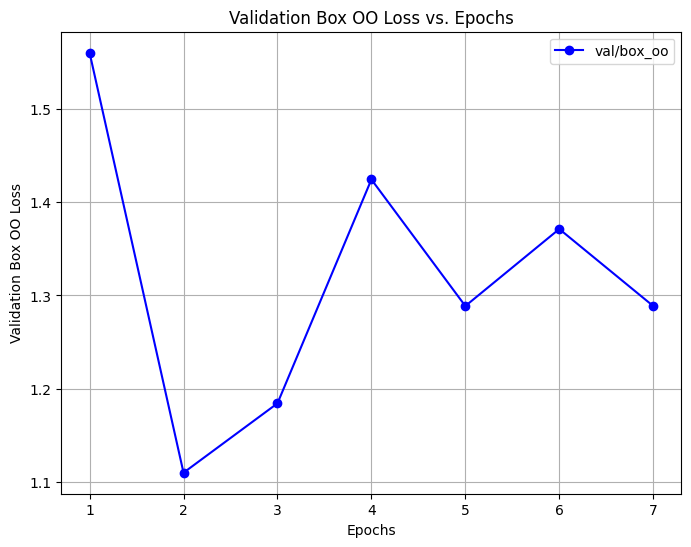

In [4]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
epochs = [1, 2, 3, 4, 5, 6, 7]
val_box_oo = [1.5606, 1.1096, 1.1841, 1.4245, 1.2886, 1.3713, 1.2886]

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, val_box_oo, marker='o', color='b', label='val/box_oo')
plt.xlabel('Epochs')
plt.ylabel('Validation Box OO Loss')
plt.title('Validation Box OO Loss vs. Epochs')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="w5iIdQUwTd5ZBNdYMVhY")
project = rf.workspace("karty").project("cards-72bgk")
version = project.version(5)
dataset = version.download("yolov8")


Note: you may need to restart the kernel to use updated packages.
loading Roboflow workspace...
loading Roboflow project...


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to cards-5 in yolov8:: 100%|██████████| 60/60 [00:00<00:00, 861.22it/s]


In [8]:
%pwd

'd:\\cards-project'

In [13]:
model = YOLO("D:/cards-project/runs/detect/v5nu-adamw/weights/best.pt")
model.info()
results = model.val(data="D:/cards-project/cards-5/data.yaml", imgsz=640, device='gpu', plots=True, name='v5nu-val')

YOLOv5n summary: 262 layers, 2518604 parameters, 0 gradients, 7.2 GFLOPs
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
YOLOv5n summary (fused): 193 layers, 2513084 parameters, 0 gradients, 7.1 GFLOPs


val: Scanning D:\cards-project\cards-5\valid\labels.cache... 27 images, 11 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.01s/it]


                   all         27         68    0.00735     0.0294    0.00551    0.00441
                   10C         27          2          0          0          0          0
                   10D         27          2          0          0          0          0
                   10H         27          4          0          0          0          0
                   10S         27          2          0          0          0          0
                    2C         27          2          0          0          0          0
                    2D         27          2      0.125        0.5     0.0938      0.075
                    2H         27          3          0          0          0          0
                    2S         27          1          0          0          0          0
                    3C         27          6          0          0          0          0
                    3D         27          5          0          0          0          0
                    3

In [14]:
model = YOLO("D:/cards-project/runs/detect/v8n-adamw/weights/best.pt")
model.info()
results = model.val(data="D:/cards-project/cards-5/data.yaml", imgsz=640, device='gpu', plots=True, name='v8n-val')

Model summary: 225 layers, 3020988 parameters, 0 gradients, 8.2 GFLOPs
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CPU (13th Gen Intel Core(TM) i9-13950HX)
Model summary (fused): 168 layers, 3015788 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\cards-project\cards-5\valid\labels.cache... 27 images, 11 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.27s/it]

                   all         27         68          0          0          0          0


Speed: 14.6ms preprocess, 293.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\v8n-val


In [19]:
from ultralytics import YOLOv10

In [20]:
model = YOLOv10("D:/cards-project/runs/detect/v10n-adamw/weights/best.pt")
model.info()
results = model.val(data="D:/cards-project/cards-5/data.yaml", imgsz=640, device='gpu', plots=True, name='v10n-val')

YOLOv10n summary: 385 layers, 2727320 parameters, 0 gradients, 8.5 GFLOPs
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:gpu (NVIDIA RTX A1000 6GB Laptop GPU, 6144MiB)
YOLOv10n summary (fused): 285 layers, 2714696 parameters, 0 gradients, 8.3 GFLOPs


val: Scanning D:\cards-project\cards-5\valid\labels.cache... 27 images, 11 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.00s/it]


                   all         27         68    0.00761      0.267     0.0487     0.0228
                   10C         27          2          0          0          0          0
                   10D         27          2          0          0          0          0
                   10H         27          4          0          0          0          0
                   10S         27          2     0.0167        0.5     0.0334       0.02
                    2C         27          2     0.0303          1      0.166     0.0504
                    2D         27          2    0.00847          1      0.111     0.0609
                    2H         27          3          0          0          0          0
                    2S         27          1          0          0          0          0
                    3C         27          6          0          0          0          0
                    3D         27          5    0.00625        0.2    0.00427   0.000854
                    3

In [31]:
model = YOLO("D:/cards-project/runs/detect/v5nu-adamw/weights/best.pt")
#model = YOLOv10("D:/cards-project/runs/detect/v8n-adamw/weights/best.pt")
#model = YOLOv10("D:/cards-project/runs/detect/v10n-adamw/weights/best.pt")

results = model(["D:/cards-project/cards-5/valid/images/20240521_205315_jpg.rf.c77b8360372b701f4e8b11d14833c6b4.jpg"])  # return a list of Results objects
#results = model(["D:/cards-project/cards-5/valid/images/20240521_205331_jpg.rf.b7afa73bb9b76d6a903695c015cdce1e.jpg"])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    #result.save(filename="result.jpg")  # save to disk


0: 640x640 2 8Hs, 1 8S, 1 9D, 65.2ms
Speed: 17.3ms preprocess, 65.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
